In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import csv
import sys
import array
import xarray as xr
import cmocean.cm as cmocean
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32
#topo_adjust to topo wi
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import pathlib
from pathlib import Path
import os
import netCDF4
from netCDF4 import Dataset as nc
import glob
from glob import glob
import glidertools as gt
import gsw

In [96]:
ds_work = xr.open_dataset('ds_clean.nc')
ds_work

<xarray.Dataset>
Dimensions:        (sg_data_point: 1011760)
Coordinates:
    ctd_time_dt64  (sg_data_point) datetime64[ns] ...
    latitude       (sg_data_point) float64 ...
    ctd_depth      (sg_data_point) float64 ...
    longitude      (sg_data_point) float64 ...
    dives          (sg_data_point) float64 ...
Dimensions without coordinates: sg_data_point
Data variables:
    temp           (sg_data_point) float64 ...
    salinity       (sg_data_point) float64 ...
    o2             (sg_data_point) float64 ...
    pressure       (sg_data_point) float64 ...
    optode_temp    (sg_data_point) float64 ...
Attributes:
    description:  dataset including gridded data and cleaned variables

In [97]:
density_comp = gsw.sigma0(ds_work.salinity, ds_work.temp)


In [98]:
# grid
depth = np.arange(0,1000,1)
latitude = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.latitude, bins=depth)
longitude = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.longitude, bins= depth)
temp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.temp, bins= depth)
sal = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.salinity, bins= depth)
o2 = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.o2, bins= depth)
p = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.pressure, bins = depth)
density = gt.grid_data(ds_work.dives, ds_work.ctd_depth, density_comp, bins = depth)
optodetemp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.optode_temp, bins=depth)

Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


(100.0, 0.0)

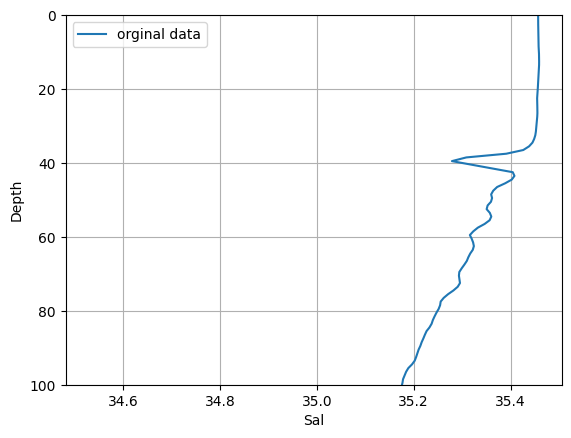

In [99]:
plt.plot(sal.sel(dives=26.5), sal.ctd_depth, label= 'orginal data')
#plt.ylim(0,80)
#plt.xlim(12,16.5)
#plt.gca().invert_yaxis()
#plt.plot(sal_f_g.sel(dives=26.5), sal_f_g.ctd_depth, label='filtered data')
#plt.ylim(30,50)
#plt.xlim(4,7)
plt.gca().invert_yaxis()
plt.xlabel('Sal')
plt.ylabel('Depth')
plt.grid()
plt.legend()
plt.ylim(100,0)

In [100]:
# Calculate the mean longitude for each dive
mean_longitude_per_dive = longitude.mean(dim='ctd_depth')

# Print the mean longitude for each dive
#mean_longitude_per_dive

# Calculate the mean latititude for each dive
mean_latitude_per_dive = latitude.mean(dim='ctd_depth')

# Print the mean longitude for each dive
#mean_latitude_per_dive

In [101]:
temp

<xarray.DataArray 'temp_vert_binned' (ctd_depth: 999, dives: 592)>
array([[        nan, 19.72037085,         nan, ..., 18.30448052,
        18.30625651, 18.30495206],
       [        nan, 19.72087793,         nan, ..., 18.30576285,
        18.30625651, 18.30495206],
       [        nan, 19.72097889,         nan, ..., 18.30847593,
        18.30625651, 18.30512312],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * ctd_depth  (ctd_depth) float64 0.5 1.5 2.5 3.5 ... 995.5 996.5 997.5 998.5
  * dives      (dives) float64 1.0 1.5 2.0 2.5 3.0 ... 296.0 296.5 297.0 297.5
Attributes:
    history:  [2024-04-25 10:02:42] (v2023.7.25) glidertools.mapping.grid_dat...

(0.0, 200.0)

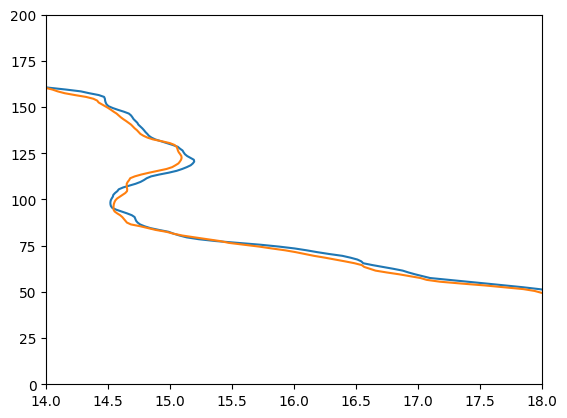

In [102]:
plt.plot(temp.sel(dives=249.5), temp.ctd_depth)
plt.plot(temp.sel(dives=250), temp.ctd_depth)
plt.xlim(14,18)
plt.ylim(0,200)

In [103]:
mean_longitude_per_dive

<xarray.DataArray 'longitude_vert_binned' (dives: 592)>
array([17.32502125, 17.32588867, 17.32939967, 17.33031419, 17.33580366,
       17.33714099, 17.34273137, 17.34636701, 17.3526786 , 17.35407596,
       17.35341461, 17.34929341, 17.3499264 , 17.35062926, 17.35272536,
       17.35129206, 17.34989593, 17.34867271, 17.34519072, 17.33995338,
       17.33583093, 17.33238596, 17.33037762, 17.3269753 , 17.32714794,
       17.32709533, 17.32784856, 17.32786709, 17.32984442, 17.33286293,
       17.34046596, 17.34733719, 17.35851278, 17.363023  , 17.37184022,
       17.37743096, 17.38891819, 17.4026241 , 17.41841661, 17.42722145,
       17.44517806, 17.45259799, 17.47642372, 17.48213261, 17.4958406 ,
       17.5070324 , 17.52343068, 17.53992219, 17.56239392, 17.58301849,
       17.61433881, 17.64781256, 17.68392237, 17.71513665, 17.74751884,
       17.77470384, 17.80347213, 17.82537055, 17.8414934 , 17.84593443,
       17.85565269, 17.86834548, 17.87504408, 17.87251079, 17.87224209,
       17.87072704, 17.86856896, 17.86179476, 17.85303487, 17.8415393 ,
       17.82699904, 17.81415984, 17.79916849, 17.78450043, 17.77018499,
       17.75822605, 17.7521076 , 17.74959123, 17.74671023, 17.7425677 ,
       17.74230683, 17.7437339 , 17.74575114, 17.74626134, 17.74949801,
       17.75499974, 17.75988396, 17.76169902, 17.76927978, 17.77616491,
       17.81610438, 17.82153972, 17.82743706, 17.83179559, 17.83690901,
       17.84262279, 17.84982404, 17.85695264, 17.86310267, 17.86496898,
...
       17.2570006 , 17.24069413, 17.22442897, 17.20826181, 17.19140618,
       17.16925517, 17.14966998, 17.12724839, 17.10832908, 17.08575983,
       17.06215572, 17.03851274, 17.01604728, 16.98978877, 16.96464366,
       16.94988721, 16.94643879, 16.94076465, 16.9365634 , 16.9299608 ,
       16.92519175, 16.91378327, 16.9047204 , 16.8899546 , 16.8819672 ,
       16.87015659, 16.85993317, 16.84736881, 16.83388117, 16.8190549 ,
       16.80582481, 16.78581014, 16.77006538, 16.75355309, 16.74109381,
       16.72454986, 16.71052242, 16.69294222, 16.68404406, 16.67529386,
       16.68080875, 16.68418684, 16.6931113 , 16.70067107, 16.70908416,
       16.71246924, 16.71833077, 16.7226207 , 16.73428075, 16.74416539,
       16.75388446, 16.76189063, 16.77184847, 16.77564723, 16.78375751,
       16.78689357, 16.79662538, 16.80209862, 16.81169399, 16.81854747,
       16.82725316, 16.83461839, 16.84508593, 16.851514  , 16.86188826,
       16.86404979, 16.86377146, 16.86413191, 16.86659489, 16.86664218,
       16.86810633, 16.86745764, 16.86813553, 16.866848  , 16.86813779,
       16.86543696, 16.86623432, 16.86333307, 16.86350926, 16.8581595 ,
       16.8560394 , 16.85047819, 16.847918  , 16.84306005, 16.8409779 ,
       16.83753236, 16.83558751, 16.83186675, 16.83012326, 16.82708991,
       16.82571397, 16.8233513 , 16.82201388, 16.82008403, 16.81924988,
       16.81724579, 16.81651749])
Coordinates:
  * dives    (dives) float64 1.0 1.5 2.0 2.5 3.0 ... 296.0 296.5 297.0 297.5

In [104]:
# creating new dataset

# Extract the data from the DataArray objects
temp_data = temp.values
salinity_data = sal.values
o2_data = o2.values
ctd_pressure_data= p.values
density_data = density.values
optode_temp_data = optodetemp.values
#latitude_data = ds_work.latitude.values
#longitude_data = ds_work.longitude.values


# Get the dimension names for temp, salinity, and o2
temp_dims = temp.dims
salinity_dims = sal.dims
o2_dims = o2.dims
ctd_pressure_dims = p.dims
density_dims = density.dims
optode_temp_dims = optodetemp.dims
#latitude_dims = ds_work.latitude_gsm.dims
#longitude_dims = ds_work.longitude_gsm.dims


# Create the Dataset
ds = xr.Dataset(
    data_vars=dict(
        temp=(temp_dims, temp_data),
        salinity=(salinity_dims, salinity_data),
        o2=(o2_dims, o2_data),
        pressure=(ctd_pressure_dims, ctd_pressure_data),
        density=(density_dims, density_data),
        optode_temp = (optode_temp_dims, optode_temp_data),
        #latitude = (latitude_dims, latitude_data),
        #longitude  = (longitude_dims, longitude_data),
        
    ),
    coords=dict(
        dives=temp.dives,
        depth=temp.ctd_depth,
        longitude=mean_longitude_per_dive,
        latitude=mean_longitude_per_dive,
    ),
    attrs=dict(description="dataset including gridded data and cleaned variables"),
)

# Print the dataset
print(ds)

<xarray.Dataset>
Dimensions:      (ctd_depth: 999, dives: 592)
Coordinates:
  * dives        (dives) float64 1.0 1.5 2.0 2.5 3.0 ... 296.0 296.5 297.0 297.5
  * ctd_depth    (ctd_depth) float64 0.5 1.5 2.5 3.5 ... 995.5 996.5 997.5 998.5
    depth        (ctd_depth) float64 0.5 1.5 2.5 3.5 ... 995.5 996.5 997.5 998.5
    longitude    (dives) float64 17.33 17.33 17.33 17.33 ... 16.82 16.82 16.82
    latitude     (dives) float64 17.33 17.33 17.33 17.33 ... 16.82 16.82 16.82
Data variables:
    temp         (ctd_depth, dives) float64 nan 19.72 nan 19.72 ... nan nan nan
    salinity     (ctd_depth, dives) float64 nan 35.51 nan 35.51 ... nan nan nan
    o2           (ctd_depth, dives) float64 nan 193.8 nan 191.5 ... nan nan nan
    pressure     (ctd_depth, dives) float64 0.647 0.2516 0.6117 ... nan nan nan
    density      (ctd_depth, dives) float64 nan 25.09 nan 25.1 ... nan nan nan
    optode_temp  (ctd_depth, dives) float64 60.6 19.75 60.81 ... nan nan nan
Attributes:
    description:  d

In [105]:
ds.to_netcdf('ds_gridded.nc')

In [106]:
# Convert micromoles per kilogram (μmol/kg) to moles per kilogram (mmol/kg)
oxygen_mol_kg = ds.o2 / 1000

# density of water (in kg/m³)
water_density =  ds.density + 1000

# Convert moles per kilogram (mmol/kg) to millimoles per cubic meter (mmol/m³)
oxygen_mol_per_kg_to_mmol_per_m3 = oxygen_mol_kg * water_density 
oxygen_mol_per_kg_to_mmol_per_m3

<xarray.DataArray (ctd_depth: 999, dives: 592)>
array([[         nan, 198.70478634,          nan, ..., 201.99691315,
        202.1017681 ,          nan],
       [         nan, 198.70384755,          nan, ..., 201.92895553,
        202.1017681 ,          nan],
       [         nan, 198.7292575 ,          nan, ..., 201.84755573,
        202.1017681 ,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * dives      (dives) float64 1.0 1.5 2.0 2.5 3.0 ... 296.0 296.5 297.0 297.5
  * ctd_depth  (ctd_depth) float64 0.5 1.5 2.5 3.5 ... 995.5 996.5 997.5 998.5
    depth      (ctd_depth) float64 0.5 1.5 2.5 3.5 ... 995.5 996.5 997.5 998.5
    longitude  (dives) float64 17.33 17.33 17.33 17.33 ... 16.82 16.82 16.82
    latitude   (dives) float64 17.33 17.33 17.33 17.33 ... 16.82 16.82 16.82

In [107]:
# creating new dataset

# Extract the data from the DataArray objects
temp_data = temp.values
salinity_data = sal.values
o2_data = o2.values
ctd_pressure_data= p.values
density_data = density.values
oxygen_mol_per_kg_to_mmol_per_m3_data = oxygen_mol_per_kg_to_mmol_per_m3.values
#latitude_data = ds_work.latitude.values
#longitude_data = ds_work.longitude.values


# Get the dimension names for temp, salinity, and o2
temp_dims = temp.dims
salinity_dims = sal.dims
o2_dims = o2.dims
ctd_pressure_dims = p.dims
density_dims = density.dims
oxygen_mol_per_kg_to_mmol_per_m3_dims = oxygen_mol_per_kg_to_mmol_per_m3.dims
#latitude_dims = ds_work.latitude_gsm.dims
#longitude_dims = ds_work.longitude_gsm.dims


# Create the Dataset
ds_new = xr.Dataset(
    data_vars=dict(
        temp=(temp_dims, temp_data),
        salinity=(salinity_dims, salinity_data),
        o2=(o2_dims, o2_data),
        pressure=(ctd_pressure_dims, ctd_pressure_data),
        density=(density_dims, density_data),
        oxygen_mol_per_kg_to_mmol_per_m3 = (oxygen_mol_per_kg_to_mmol_per_m3_dims, oxygen_mol_per_kg_to_mmol_per_m3_data),
        #latitude = (latitude_dims, latitude_data),
        #longitude  = (longitude_dims, longitude_data),
        
    ),
    coords=dict(
        dives=temp.dives,
        ctd_depth=temp.ctd_depth,
        longitude=mean_longitude_per_dive,
        latitude=mean_latitude_per_dive,
    ),
    attrs=dict(description="dataset including gridded data and cleaned variables"),
)

# Print the dataset
print(ds_new)

<xarray.Dataset>
Dimensions:                           (ctd_depth: 999, dives: 592)
Coordinates:
  * dives                             (dives) float64 1.0 1.5 ... 297.0 297.5
  * ctd_depth                         (ctd_depth) float64 0.5 1.5 ... 998.5
    longitude                         (dives) float64 17.33 17.33 ... 16.82
    latitude                          (dives) float64 -37.52 -37.52 ... -34.18
Data variables:
    temp                              (ctd_depth, dives) float64 nan ... nan
    salinity                          (ctd_depth, dives) float64 nan ... nan
    o2                                (ctd_depth, dives) float64 nan ... nan
    pressure                          (ctd_depth, dives) float64 0.647 ... nan
    density                           (ctd_depth, dives) float64 nan ... nan
    oxygen_mol_per_kg_to_mmol_per_m3  (ctd_depth, dives) float64 nan ... nan
Attributes:
    description:  dataset including gridded data and cleaned variables


In [108]:
ds_new

<xarray.Dataset>
Dimensions:                           (ctd_depth: 999, dives: 592)
Coordinates:
  * dives                             (dives) float64 1.0 1.5 ... 297.0 297.5
  * ctd_depth                         (ctd_depth) float64 0.5 1.5 ... 998.5
    longitude                         (dives) float64 17.33 17.33 ... 16.82
    latitude                          (dives) float64 -37.52 -37.52 ... -34.18
Data variables:
    temp                              (ctd_depth, dives) float64 nan ... nan
    salinity                          (ctd_depth, dives) float64 nan ... nan
    o2                                (ctd_depth, dives) float64 nan ... nan
    pressure                          (ctd_depth, dives) float64 0.647 ... nan
    density                           (ctd_depth, dives) float64 nan ... nan
    oxygen_mol_per_kg_to_mmol_per_m3  (ctd_depth, dives) float64 nan ... nan
Attributes:
    description:  dataset including gridded data and cleaned variables

In [109]:
#ox_upcast = xr.open_dataset('ox_upcast_data.nc')
ox_downcast = xr.open_dataset('ds_ctd_final.nc')

In [110]:
# Extract oxygen data at station 15
#oxygenup_station_15 = ox_upcast.sel(station=15)
# Extract oxygen data at station 15
oxygendown_station_15 = ox_downcast.sel(station=15, cast= 'down')

In [111]:
oxygendown_station_15

<xarray.Dataset>
Dimensions:       (pressure: 5100)
Coordinates:
  * pressure      (pressure) int64 0 1 2 3 4 5 ... 5094 5095 5096 5097 5098 5099
    cast          <U4 'down'
    station       int64 15
    longitude     float64 ...
    max_pressure  float64 ...
    latitude      float64 ...
Data variables:
    temp          (pressure) float64 ...
    ox_downcast   (pressure) float64 ...
Attributes:
    description:  CTD dataset

In [112]:
# Extract longitude and latitude
down_longitude_station_15 = oxygendown_station_15.longitude.values
down_latitude_station_15 = oxygendown_station_15.latitude.values

print("Longitude downtake at Station 15:", down_longitude_station_15)
print("Latitude downtake at Station 15:", down_latitude_station_15)

Longitude downtake at Station 15: 17.354
Latitude downtake at Station 15: -37.5289


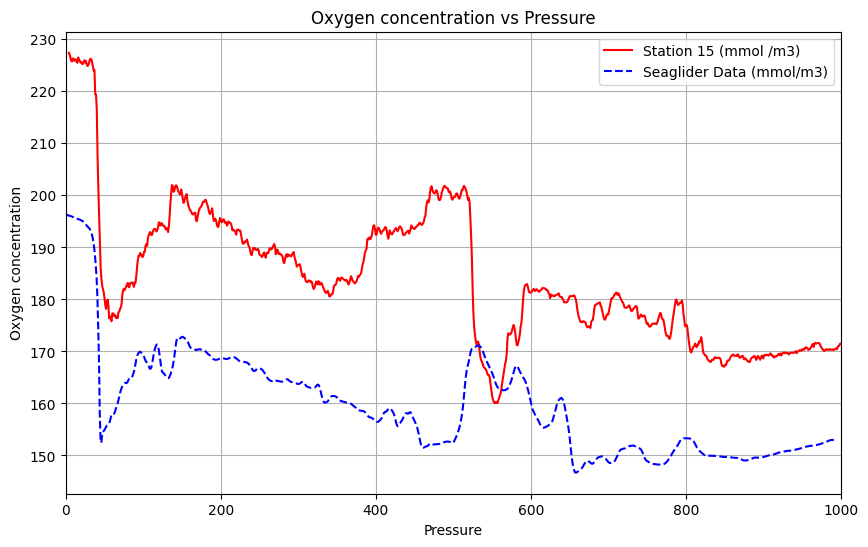

In [113]:
# Filter the dataset for the desired longitude and latitude
longitude = down_longitude_station_15
latitude = down_latitude_station_15

# Select the variable 'oxygen_concentration_mmm3' from the dataset
oxygen_concentration = oxygendown_station_15['ox_downcast']

# Extract pressure values for station 15
pressure_levels_station_15 = oxygendown_station_15.pressure.values

# Plot oxygen data against pressure at station 15
plt.figure(figsize=(10, 6))
plt.plot(pressure_levels_station_15, oxygen_concentration, color='red', label='Station 15 (mmol /m3)' )

# Define the proximity threshold (in degrees)
proximity_threshold = 0.006 # Adjust as needed

# Filter the dataset for data points within the proximity threshold
filtered_data = ds_new.where(
    (np.abs(ds_new['longitude'] - longitude) < proximity_threshold) &
    (np.abs(ds_new['latitude'] - latitude) < proximity_threshold),
    drop=True
)

# Plot dissolved oxygen against pressure for filtered data
if len(filtered_data['pressure']) != 0:
    plt.plot(filtered_data['pressure'], filtered_data['oxygen_mol_per_kg_to_mmol_per_m3'], label='Seaglider Data (mmol/m3)', color='blue', linestyle='--')


plt.xlabel('Pressure')
plt.ylabel('Oxygen concentration')
plt.title('Oxygen concentration vs Pressure')
plt.grid(True)
plt.legend()
plt.xlim(0, 1000)
plt.show()

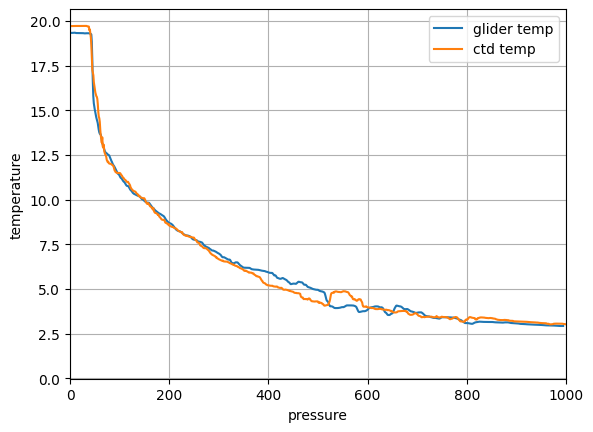

In [114]:
plt.plot(filtered_data.pressure, filtered_data.temp, label= 'glider temp')
plt.plot(oxygendown_station_15.pressure, oxygendown_station_15.temp, label='ctd temp')
plt.xlim(0, 1000)
plt.xlabel('pressure')
plt.ylabel('temperature')
plt.legend()
plt.grid()


In [115]:
sliced_data = oxygendown_station_15.isel(pressure=slice(999))


In [116]:
sliced_data

<xarray.Dataset>
Dimensions:       (pressure: 999)
Coordinates:
  * pressure      (pressure) int64 0 1 2 3 4 5 6 ... 992 993 994 995 996 997 998
    cast          <U4 'down'
    station       int64 15
    longitude     float64 17.35
    max_pressure  float64 ...
    latitude      float64 -37.53
Data variables:
    temp          (pressure) float64 nan nan nan nan ... 3.048 3.046 3.044 3.036
    ox_downcast   (pressure) float64 nan nan nan nan ... 170.4 170.8 171.1 171.1
Attributes:
    description:  CTD dataset

In [117]:
filtered_data

<xarray.Dataset>
Dimensions:                           (ctd_depth: 999, dives: 1)
Coordinates:
  * dives                             (dives) float64 9.5
  * ctd_depth                         (ctd_depth) float64 0.5 1.5 ... 998.5
    longitude                         (dives) float64 17.35
    latitude                          (dives) float64 -37.53
Data variables:
    temp                              (ctd_depth, dives) float64 19.33 ... nan
    salinity                          (ctd_depth, dives) float64 35.53 ... nan
    o2                                (ctd_depth, dives) float64 191.4 ... nan
    pressure                          (ctd_depth, dives) float64 0.8676 ... nan
    density                           (ctd_depth, dives) float64 25.21 ... nan
    oxygen_mol_per_kg_to_mmol_per_m3  (ctd_depth, dives) float64 196.2 ... nan
Attributes:
    description:  dataset including gridded data and cleaned variables

In [118]:
ds2=filtered_data.copy()
ds2=ds2.rename_vars({"pressure":"P"})
ds2=ds2.rename_dims({"ctd_depth":"pressure"})
ds2["ctd_depth"]=ds2.ctd_depth-0.5
ds2

<xarray.Dataset>
Dimensions:                           (pressure: 999, dives: 1)
Coordinates:
  * dives                             (dives) float64 9.5
    ctd_depth                         (pressure) float64 0.0 1.0 ... 997.0 998.0
    longitude                         (dives) float64 17.35
    latitude                          (dives) float64 -37.53
Dimensions without coordinates: pressure
Data variables:
    temp                              (pressure, dives) float64 19.33 ... nan
    salinity                          (pressure, dives) float64 35.53 ... nan
    o2                                (pressure, dives) float64 191.4 ... nan
    P                                 (pressure, dives) float64 0.8676 ... nan
    density                           (pressure, dives) float64 25.21 ... nan
    oxygen_mol_per_kg_to_mmol_per_m3  (pressure, dives) float64 196.2 ... nan
Attributes:
    description:  dataset including gridded data and cleaned variables

In [119]:
filtered_data

<xarray.Dataset>
Dimensions:                           (ctd_depth: 999, dives: 1)
Coordinates:
  * dives                             (dives) float64 9.5
  * ctd_depth                         (ctd_depth) float64 0.5 1.5 ... 998.5
    longitude                         (dives) float64 17.35
    latitude                          (dives) float64 -37.53
Data variables:
    temp                              (ctd_depth, dives) float64 19.33 ... nan
    salinity                          (ctd_depth, dives) float64 35.53 ... nan
    o2                                (ctd_depth, dives) float64 191.4 ... nan
    pressure                          (ctd_depth, dives) float64 0.8676 ... nan
    density                           (ctd_depth, dives) float64 25.21 ... nan
    oxygen_mol_per_kg_to_mmol_per_m3  (ctd_depth, dives) float64 196.2 ... nan
Attributes:
    description:  dataset including gridded data and cleaned variables

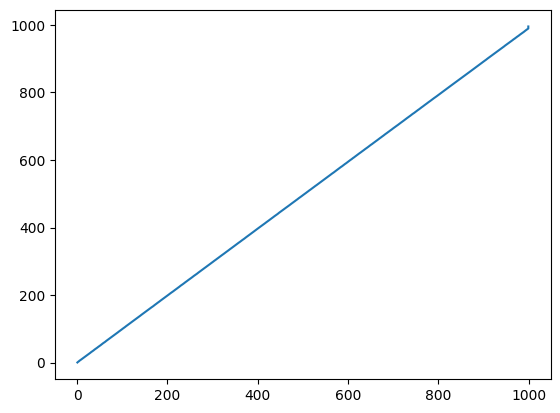

In [120]:
plt.plot(filtered_data.pressure, filtered_data.ctd_depth)

In [125]:
filtered_ctd_ox_1 = sliced_data.ox_downcast.where(np.abs(sliced_data.temp - ds2.temp) < 0.1)

filtered_glider_ox_1 = ds2.o2.where(np.abs(sliced_data.temp - ds2.temp) < 0.1)


from scipy import stats
x = filtered_glider_ox_1.sel(dives=9.5).values
y = filtered_ctd_ox_1.sel(dives=9.5).values
np.isfinite

index = np.where(np.isfinite(x) & np.isfinite(y)  )
res = stats.linregress(x[index],y[index])
res


LinregressResult(slope=0.9338287407623156, intercept=39.47586661207529, rvalue=0.9089774622846043, pvalue=1.6446974222452434e-106, stderr=0.025823948348503052, intercept_stderr=4.020995135050247)

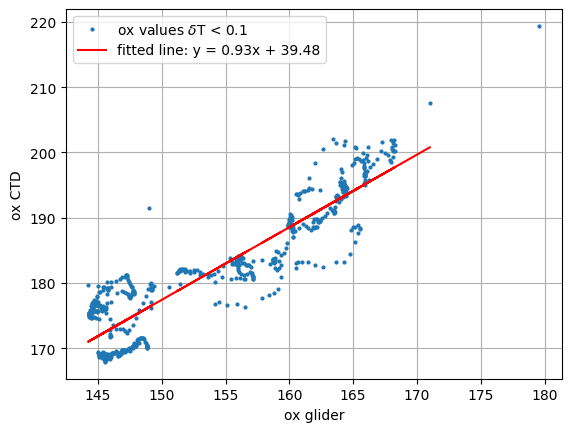

In [135]:
plt.plot(x, y, 'o', label='ox values $\delta$T < 0.1', markersize=2)
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line: y = 0.93x + 39.48')
plt.xlabel('ox glider')
plt.ylabel('ox CTD')
plt.legend()
plt.grid()
plt.show()

[]

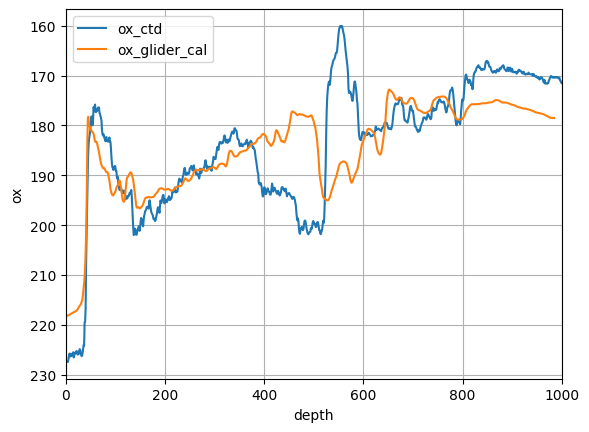

In [150]:
Calibrated_o2_1 = ds.o2*0.9338287407623156 + 39.47586661207529
plt.plot(oxygendown_station_15.pressure.values,oxygendown_station_15.ox_downcast.values, label='ox_ctd')
plt.xlim(0,1000)

plt.plot(Calibrated_o2_1.ctd_depth.values,Calibrated_o2_1.sel(dives=9.5).values, label='ox_glider_cal')
plt.legend()
plt.grid()
plt.xlabel('depth')
plt.ylabel('ox')

plt.gca().invert_yaxis()
plt.plot()

In [138]:
filtered_ctd_ox_05 = sliced_data.ox_downcast.where(np.abs(sliced_data.temp - ds2.temp) < 0.05)

filtered_glider_ox_05 = ds2.o2.where(np.abs(sliced_data.temp - ds2.temp) < 0.05)


from scipy import stats
x = filtered_glider_ox_05.sel(dives=9.5).values
y = filtered_ctd_ox_05.sel(dives=9.5).values
np.isfinite

index = np.where(np.isfinite(x) & np.isfinite(y)  )
res = stats.linregress(x[index],y[index])
res


LinregressResult(slope=0.8988037565334832, intercept=45.005426894572395, rvalue=0.923861991768602, pvalue=3.846733938604052e-53, stderr=0.03357321532929084, intercept_stderr=5.236492068649363)

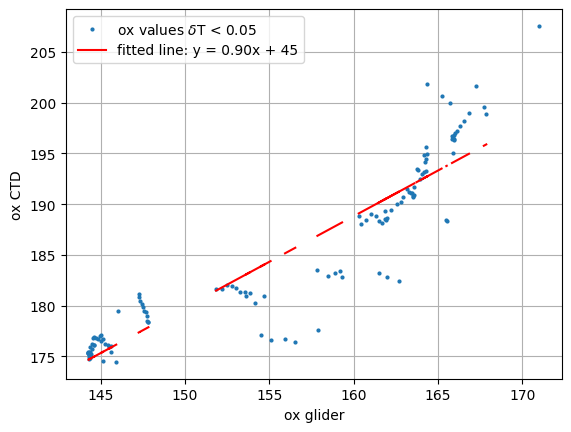

In [139]:
plt.plot(x, y, 'o', label='ox values $\delta$T < 0.05', markersize=2)
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line: y = 0.90x + 45')
plt.xlabel('ox glider')
plt.ylabel('ox CTD')
plt.legend()
plt.grid()
plt.show()

[]

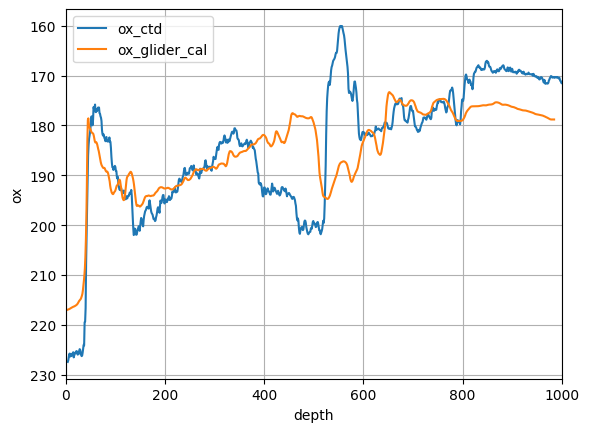

In [152]:
Calibrated_o2_05 = ds.o2*0.8988037565334832 + 45.005426894572395

plt.plot(oxygendown_station_15.pressure.values,oxygendown_station_15.ox_downcast.values, label='ox_ctd')
plt.xlim(0,1000)

plt.plot(Calibrated_o2_05.ctd_depth.values,Calibrated_o2_05.sel(dives=9.5).values, label='ox_glider_cal')

plt.legend()
plt.grid()
plt.xlabel('depth')
plt.ylabel('ox')

plt.gca().invert_yaxis()
plt.plot()

In [140]:
filtered_ctd_ox_15 = sliced_data.ox_downcast.where(np.abs(sliced_data.temp - ds2.temp) < 0.15)

filtered_glider_ox_15 = ds2.o2.where(np.abs(sliced_data.temp - ds2.temp) < 0.15)


from scipy import stats
x = filtered_glider_ox_15.sel(dives=9.5).values
y = filtered_ctd_ox_15.sel(dives=9.5).values
np.isfinite

index = np.where(np.isfinite(x) & np.isfinite(y)  )
res = stats.linregress(x[index],y[index])
res

LinregressResult(slope=1.075623197535117, intercept=16.32670838890337, rvalue=0.9035311655136254, pvalue=2.366125789049538e-174, stderr=0.023581292631572232, intercept_stderr=3.630648493085869)

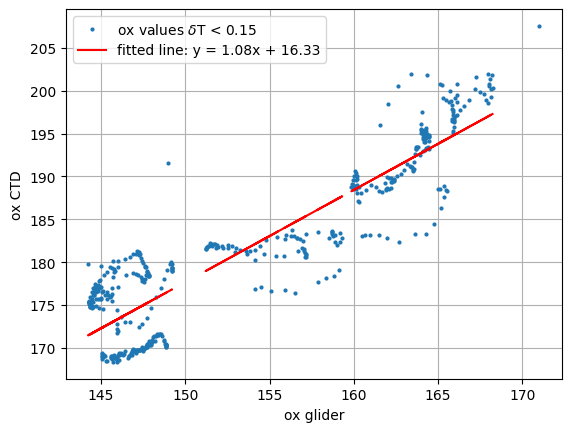

In [141]:
plt.plot(x, y, 'o', label='ox values $\delta$T < 0.15', markersize=2)
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line: y = 1.08x + 16.33')
plt.xlabel('ox glider')
plt.ylabel('ox CTD')
plt.legend()
plt.grid()
plt.show()

[]

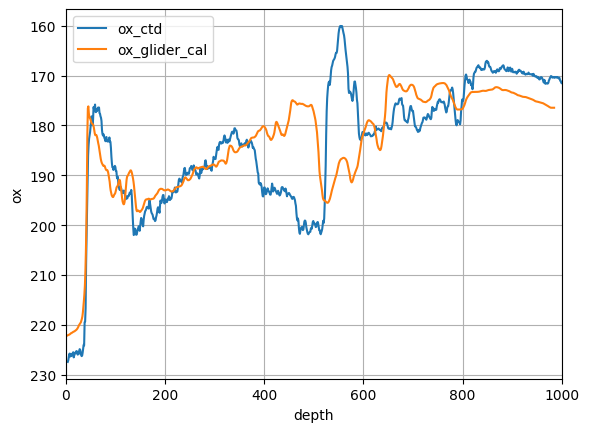

In [153]:
Calibrated_o2_15 = ds.o2*1.075623197535117 + 16.32670838890337

plt.plot(oxygendown_station_15.pressure.values,oxygendown_station_15.ox_downcast.values, label='ox_ctd')
plt.xlim(0,1000)

plt.plot(Calibrated_o2_15.ctd_depth.values,Calibrated_o2_15.sel(dives=9.5).values, label='ox_glider_cal')

plt.legend()
plt.grid()
plt.xlabel('depth')
plt.ylabel('ox')

plt.gca().invert_yaxis()
plt.plot()

In [127]:
filtered_ctd_ox_2 = sliced_data.ox_downcast.where(np.abs(sliced_data.temp - ds2.temp) < 0.2)

filtered_glider_ox_2 = ds2.o2.where(np.abs(sliced_data.temp - ds2.temp) < 0.2)


from scipy import stats
x = filtered_glider_ox_2.sel(dives=9.5).values
y = filtered_ctd_ox_2.sel(dives=9.5).values
np.isfinite

index = np.where(np.isfinite(x) & np.isfinite(y)  )
res = stats.linregress(x[index],y[index])
res

LinregressResult(slope=1.1112894154973296, intercept=10.745463553050968, rvalue=0.9084895587557543, pvalue=1.591316836493157e-218, stderr=0.02139288725344334, intercept_stderr=3.2978734737140396)

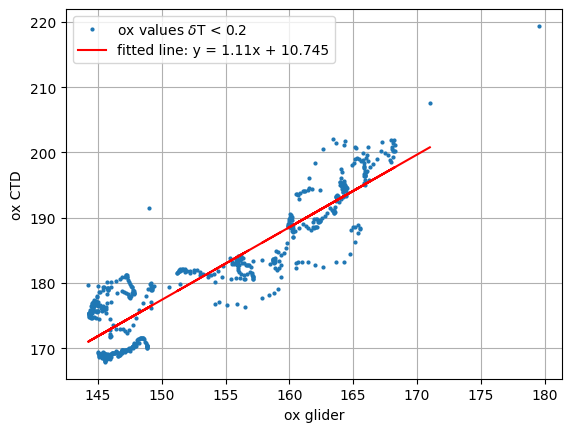

In [136]:
plt.plot(x, y, 'o', label='ox values $\delta$T < 0.2', markersize=2)
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line: y = 1.11x + 10.745')
plt.xlabel('ox glider')
plt.ylabel('ox CTD')
plt.legend()
plt.grid()
plt.show()

[]

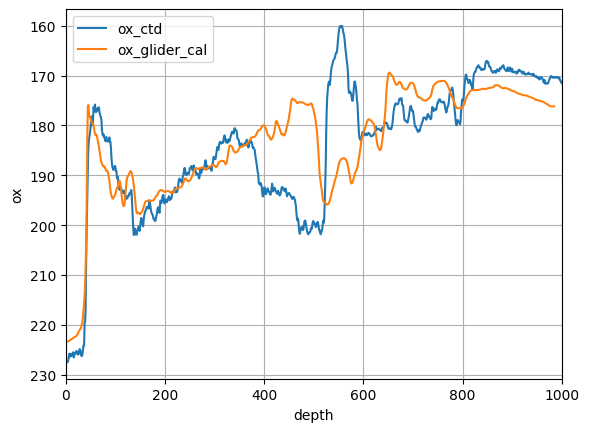

In [154]:
Calibrated_o2_2 = ds.o2*1.1112894154973296 + 10.745463553050968

plt.plot(oxygendown_station_15.pressure.values,oxygendown_station_15.ox_downcast.values, label='ox_ctd')
plt.xlim(0,1000)

plt.plot(Calibrated_o2_2.ctd_depth.values,Calibrated_o2_2.sel(dives=9.5).values, label='ox_glider_cal')
plt.legend()
plt.grid()
plt.xlabel('depth')
plt.ylabel('ox')

plt.gca().invert_yaxis()
plt.plot()


In [ ]:
offset = (sliced_data.ox_downcast - ds2.o2).mean()
offset

In [ ]:
ds["o2"]=ds.o2+offset 

ds

In [ ]:
# Drop the unwanted variables from the dataset
filtered_data = ds.drop_vars(['cast', 'station', 'max_pressure', 'depth'])
filtered_data

In [ ]:
plt.figure(figsize=(12, 6))


plt.pcolormesh(filtered_data.dives, filtered_data.ctd_depth, filtered_data.o2)


#plt.figure(figsize=(12, 6))

# Add colorbar
plt.colorbar(label='Dissolved Oxygen (micromoles/kg)')


# Add labels and title
plt.xlabel('Dives', fontsize=12)
plt.ylabel('Depth (m)', fontsize=12)

# Invert y-axis
plt.gca().invert_yaxis()
#plt.plot()


In [ ]:

plt.plot(oxygendown_station_15.pressure.values,oxygendown_station_15.ox_downcast.values)
plt.xlim(0,1000)

plt.plot(filtered_data.pressure.values,filtered_data.o2.sel(dives=9.5).values)
#plt.legend()

plt.gca().invert_yaxis()
plt.plot()


In [ ]:
filtered_data.to_netcdf('ds_calibrated.nc')